<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [358]:
df = pd.read_csv('/data/dst-3.0_16_1_hh_database.csv', sep=';')
df.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [359]:
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [361]:
missing_values = df.isnull().sum()
missing_values

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [362]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [363]:
def get_education_level(text):
    if pd.isna(text):
        return np.nan
    first_two_words = ' '.join(text.split()[:2]).lower()
    if "неоконченное высшее" in first_two_words:
        return "неоконченное высшее"
    elif "высшее" in first_two_words:
        return "высшее"
    elif "среднее специальное" in first_two_words:
        return "среднее специальное"
    elif "среднее" in first_two_words:
        return "среднее"
    else:
        return "другое"


df['Образование'] = df['Образование и ВУЗ'].apply(get_education_level)
df.drop('Образование и ВУЗ', axis=1, inplace=True)
df['Образование'].value_counts()



Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [364]:
"""Преобразование данных"""
df['Пол'] = df['Пол, возраст'].apply(lambda x: x[0])
df['Возраст'] = df['Пол, возраст'].apply(lambda x: \
    int((x.split(sep=',')[1]).split()[0]))
df.drop('Пол, возраст', axis=1, inplace=True)

"""Контрольные вопросы"""
mask = df['Пол'] == 'Ж'
print(round((df[mask].shape[0]/df.shape[0]) * 100, 2)) # процент женщин
print(round(df['Возраст'].mean(), 1)) # средний возраст

19.07
32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [365]:
"""Опыт работы в месяцах, функция для DataFrame.apply(func)"""
def get_experience(x):
    if pd.isna(x):
        return np.nan
    if x == 'Не указано':
        return np.nan

    try:
        x_words = x.split()
        if len(x_words) < 4:
            return np.nan

        if x_words[3][0:5] == 'месяц':   # если только месяцы
            return int(x_words[2])
        elif len(x_words) >= 6 and x_words[5][0:5] == 'месяц': # если годы и месяцы
            return int(x_words[2])*12 + int(x_words[4])
        else:                            # если только годы
            return int(x_words[2]) * 12
    except:
        return np.nan


"""Преобразование данных"""
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(get_experience)
df.drop('Опыт работы', axis=1, inplace=True)

"""Контрольные вопросы"""
median_value = df['Опыт работы (месяц)'].median() # медиана опыта работы
print(f"Медиана опыта работы: {median_value} месяцев")

Медиана опыта работы: 100.0 месяцев


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [366]:
"Выделяем город, функция для DataFrame.apply(func)"
def get_city(x):
    million_cities = [
        'Новосибирск', 'Екатеринбург', 'Нижний Новгород', \
        'Казань', 'Челябинск', 'Омск', 'Самара',          \
        'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь',   \
        'Воронеж', 'Волгоград'
    ]
    city = x.split()[0]
    if city == 'Москва':
        return 'Москва'
    elif city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'


"Готовность к переезду, функция для DataFrame.apply(func)"
def get_migration(x):
    express_1 = re.search(r'не готов к переезду', x)
    express_2 = re.search(r'не готова к переезду', x)
    if express_1 or express_2: # если не готов(а)
        return False
    else:                      # иначе:
        return True


"Готовность к командировкам, функция для DataFrame.apply(func)"
def get_business_trip(x):
    express_1 = re.search(r'не готов к командировкам', x)
    express_2 = re.search(r'не готова к командировкам', x)
    if express_1 or express_2: # если не готов(а)
        return False
    else:                      # иначе:
        return True


"""Преобразование данных"""
df['Город'] = df['Город, переезд, командировки'].apply(get_city)
df['Готовность к переезду'] \
    = df['Город, переезд, командировки'].apply(get_migration)
df['Готовность к командировкам'] \
    = df['Город, переезд, командировки'].apply(get_business_trip)
df.drop('Город, переезд, командировки', axis=1, inplace=True)

"""Контрольные вопросы"""
mask0 = df['Город'] == 'Санкт-Петербург'
mask1 = df['Готовность к переезду']
mask2 = df['Готовность к командировкам']
# Процент жителей Санкт-Петербурга:
print(round(df[mask0].shape[0] / df.shape[0] * 100))
# Процент готовых к переезду и командировкам:
print(round(df[mask1 & mask2].shape[0] / df.shape[0] * 100))

11
32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [367]:
"Функция для обработки типов занятости"
def get_employment(x):
    # Разделяем строку на отдельные виды занятости
    employment_types = x.split(sep=', ')
    # Проверяем наличие каждого типа занятости
    full_time = True if 'полная занятость' in employment_types else False
    part_time = True if 'частичная занятость' in employment_types else False
    project_based = True if 'проектная работа' in employment_types else False
    internship = True if 'стажировка' in employment_types else False
    volunteering = True if 'волонтерство' in employment_types else False
    # Возвращаем список булевых значений для каждого типа
    return [full_time, part_time, project_based, internship, volunteering]


"Функция для обработки графиков работы"
def get_schedule(x):
    # Разделяем строку на отдельные форматы работы
    schedule_types = x.split(sep=', ')
    # Проверяем наличие каждого графика работы
    full_day = True if 'полный день' in schedule_types else False
    shift_work = True if 'сменный график' in schedule_types else False
    flexible = True if 'гибкий график' in schedule_types else False
    rotation = True if 'вахтовый метод' in schedule_types else False
    remote = True if 'удаленная работа' in schedule_types else False
    # Возвращаем список булевых значений для каждого графика
    return [full_day, shift_work, flexible, rotation, remote]


"""Создание бинарных признаков для типов занятости"""
# Применяем функцию к столбцу с занятостью
employment_series = df['Занятость'].apply(get_employment)
# Преобразуем результаты в отдельный DataFrame
employment_df = pd.DataFrame(
    data=list(employment_series),
    columns=['Полная занятость', 'Частичная занятость',
             'Проектная работа', 'Стажировка', 'Волонтерство'])
# Объединяем с основным DataFrame и удаляем исходный столбец
df = pd.concat([df, employment_df], axis=1)
df.drop('Занятость', axis=1, inplace=True)

"""Создание бинарных признаков для графиков работы"""
# Применяем функцию к столбцу с графиком работы
schedule_series = df['График'].apply(get_schedule)
# Преобразуем результаты в отдельный DataFrame
schedule_df = pd.DataFrame(
    data=list(schedule_series),
    columns=['Полный день', 'Сменный график',
             'Гибкий график', 'Вахтовый метод', 'Удаленная работа'])
# Объединяем с основным DataFrame и удаляем исходный столбец
df = pd.concat([df, schedule_df], axis=1)
df.drop('График', axis=1, inplace=True)

"""Анализ предпочтений соискателей"""
# Создаем маски для фильтрации данных
project_work_mask = df['Проектная работа']
volunteering_mask = df['Волонтерство']
rotation_method_mask = df['Вахтовый метод']
flexible_schedule_mask = df['Гибкий график']

# Подсчитываем количество соискателей, которые ищут проектную работу И волонтерство
"""Контрольные вопросы"""
project_and_volunteer_count = df[project_work_mask & volunteering_mask].shape[0]
print(f"Ищут проектную работу и волонтерство: {project_and_volunteer_count} человек")

# Подсчитываем количество соискателей, которые предпочитают вахтовый метод И гибкий график
rotation_and_flexible_count = df[rotation_method_mask & flexible_schedule_mask].shape[0]
print(f"Рассматривают вахтовый метод и гибкий график: {rotation_and_flexible_count} человек")

# Дополнительная статистика: сколько людей ищут только проектную работу
project_only_count = df[project_work_mask & ~volunteering_mask].shape[0]
print(f"Ищут только проектную работу: {project_only_count} человек")

Ищут проектную работу и волонтерство: 436 человек
Рассматривают вахтовый метод и гибкий график: 2311 человек
Ищут только проектную работу: 7632 человек


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [368]:
# таблица с курсами валют на дату
exchange_rates = pd.read_csv('/data/ExchangeRates.csv')

"""Преобразование данных"""
# Преобразование дат с указанием формата
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True)
df['Дата'] = df['Обновление резюме'].dt.date
df['Дата'] = pd.to_datetime(df['Дата'])
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'])

# Получаем величины (value) и валюты (currency) ЗП
df['value'] = df['ЗП'].apply(lambda x: x.split()[0])
df['currency'] = df['ЗП'].apply(lambda x: x.split()[1])
replace_dict = {'грн.': 'UAH', 'бел.руб.': 'BYN', 'сум':'UZS'} # в ISO
df['currency'] = df['currency'].replace(replace_dict)

# Курс обмена валют на дату резюме (слияние таблиц)
exchange_rates = exchange_rates[['currency', 'date', 'close', 'proportion']]
df = df.merge(
    exchange_rates,
    how='left',
    left_on=['Дата', 'currency'],
    right_on=['date', 'currency']
)

# Заполнение пропущенных значений без inplace
df['close'] = df['close'].fillna(1)
df['proportion'] = df['proportion'].fillna(1)

# Пересчет ЗП в рубли
df['value'] = df['value'].astype(float)
df['ЗП (руб)'] = df['close'] / df['proportion'] * df['value']

# Очистка
df = df.drop(['Обновление резюме', 'ЗП', 'date', 'value', 'currency',
    'close', 'proportion'], axis=1)

med_zp = round(df['ЗП (руб)'].median() / 1000)

"""Контрольные вопросы"""
print(f"Медианная зарплата: {med_zp} тысяч рублей")

/var/folders/9c/p_z6c2m52pn71250yf4hc6500000gn/T/ipykernel_1490/2913895748.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange_rates['date'] = pd.to_datetime(exchange_rates['date'])


Медианная зарплата: 59 тысяч рублей


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Основные статистики возраста:
count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64


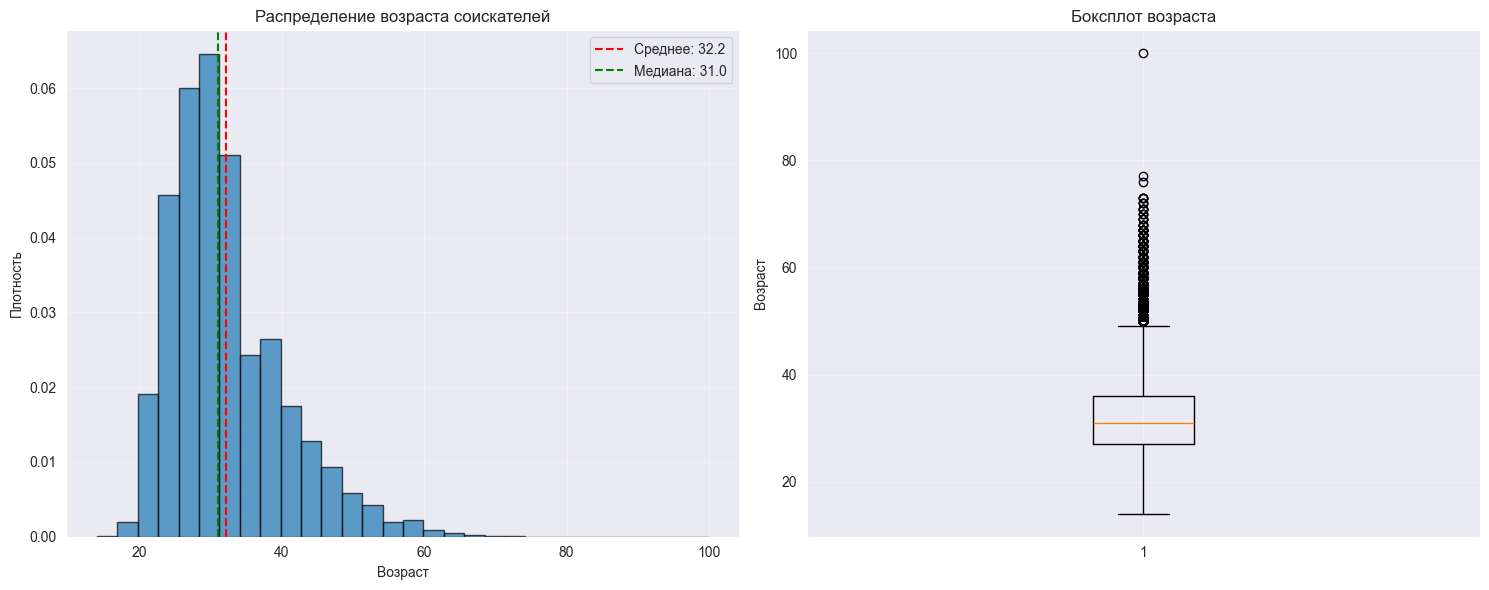


=== Анализ распределения возраста ===
Мода распределения: 30 лет
Предельные значения: от 14 до 100 лет
Стандартное отклонение: 7.93 лет
Интерквартильный размах (IQR): от 27.0 до 36.0 лет
В интервале ±1σ от среднего: 71.8% соискателей

Потенциальные аномалии (по методу Тьюки):
Нижняя граница: 13.5 лет
Верхняя граница: 49.5 лет
Количество потенциальных выбросов: 1774
Выбросы по возрасту:
       Возраст
19399       50
43069       50
19184       50
19156       50
18898       50
...        ...
19628       73
10907       73
15419       76
5597        77
33654      100

[1774 rows x 1 columns]

=== Анализ аномальных значений ===
Соискателей младше 18 лет: 21
Соискателей старше 65 лет: 45
Асимметрия распределения: 1.13
Распределение имеет правую асимметрию (скошено в сторону младших возрастов)


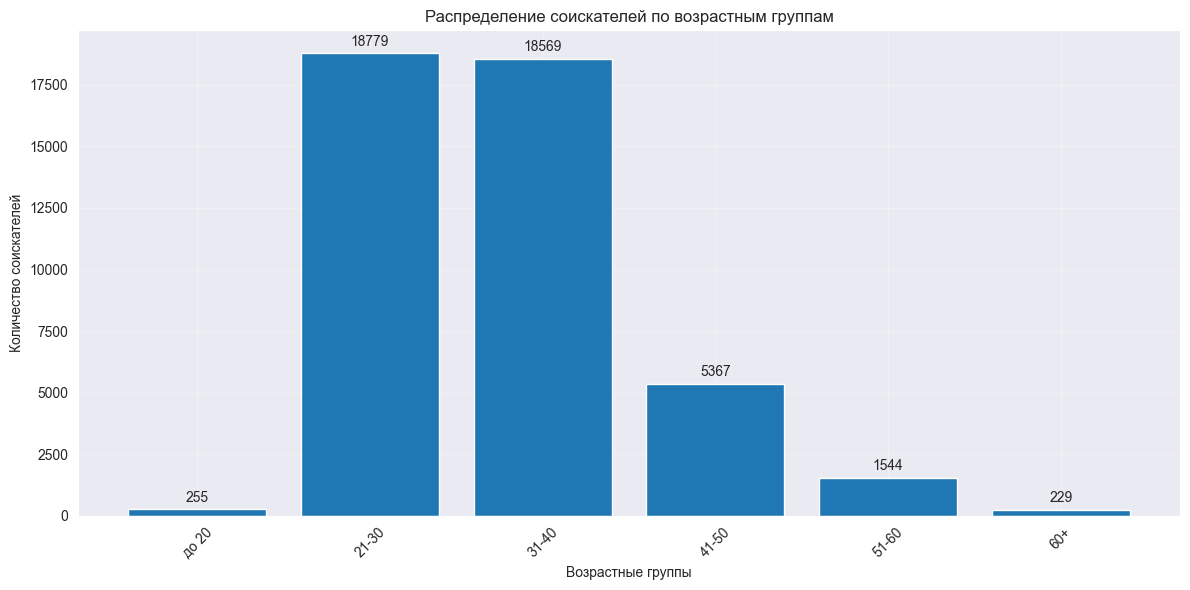


Распределение по возрастным группам:
до 20: 255 чел. (0.6%)
21-30: 18779 чел. (42.0%)
31-40: 18569 чел. (41.5%)
41-50: 5367 чел. (12.0%)
51-60: 1544 чел. (3.5%)
60+: 229 чел. (0.5%)

=== Информация о размере выборки ===
Количество строк (наблюдений): 44744
Количество столбцов: 24


In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Приводим столбец возраста к числовому виду
df['Возраст'] = pd.to_numeric(df['Возраст'], errors='coerce')

# Проверяем результат
print("Основные статистики возраста:")
print(df['Возраст'].describe())

# Строим визуализации
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма с плотностью распределения
ax1.hist(df['Возраст'].dropna(), bins=30, edgecolor='black', alpha=0.7, density=True)
ax1.axvline(df['Возраст'].mean(), color='red', linestyle='--', label=f'Среднее: {df["Возраст"].mean():.1f}')
ax1.axvline(df['Возраст'].median(), color='green', linestyle='--', label=f'Медиана: {df["Возраст"].median():.1f}')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Плотность')
ax1.set_title('Распределение возраста соискателей')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Боксплот (ящик с усами)
ax2.boxplot(df['Возраст'].dropna())
ax2.set_ylabel('Возраст')
ax2.set_title('Боксплот возраста')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительная информация о распределении
print("\n=== Анализ распределения возраста ===")
print(f"Мода распределения: {df['Возраст'].mode().values[0]} лет")
print(f"Предельные значения: от {df['Возраст'].min()} до {df['Возраст'].max()} лет")
print(f"Стандартное отклонение: {df['Возраст'].std():.2f} лет")

# Определяем интервал, в котором находится большинство соискателей
Q1 = df['Возраст'].quantile(0.25)
Q3 = df['Возраст'].quantile(0.75)
IQR = Q3 - Q1
print(f"Интерквартильный размах (IQR): от {Q1:.1f} до {Q3:.1f} лет")

# Процент соискателей в интервале ±1 стандартное отклонение от среднего
mean_age = df['Возраст'].mean()
std_age = df['Возраст'].std()
within_1_std = ((df['Возраст'] >= mean_age - std_age) & (df['Возраст'] <= mean_age + std_age)).mean() * 100
print(f"В интервале ±1σ от среднего: {within_1_std:.1f}% соискателей")

# Анализ аномалий
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Возраст'] < lower_bound) | (df['Возраст'] > upper_bound)]
print(f"\nПотенциальные аномалии (по методу Тьюки):")
print(f"Нижняя граница: {lower_bound:.1f} лет")
print(f"Верхняя граница: {upper_bound:.1f} лет")
print(f"Количество потенциальных выбросов: {len(outliers)}")

if len(outliers) > 0:
    print("Выбросы по возрасту:")
    print(outliers[['Возраст']].sort_values('Возраст'))

# Более детальный анализ аномалий
print("\n=== Анализ аномальных значений ===")

# Считаем слишком молодыми тех, кто младше 18 лет
too_young = df[df['Возраст'] < 18]
print(f"Соискателей младше 18 лет: {len(too_young)}")

# Считаем слишком старшими тех, кто старше 65 лет
too_old = df[df['Возраст'] > 65]
print(f"Соискателей старше 65 лет: {len(too_old)}")

# Проверяем асимметрию распределения
skewness = stats.skew(df['Возраст'].dropna())
print(f"Асимметрия распределения: {skewness:.2f}")
if abs(skewness) > 0.5:
    if skewness > 0:
        print("Распределение имеет правую асимметрию (скошено в сторону младших возрастов)")
    else:
        print("Распределение имеет левую асимметрию (скошено в сторону старших возрастов)")
else:
    print("Распределение приблизительно симметрично")

# Дополнительная визуализация - распределение по возрастным группам
plt.figure(figsize=(12, 6))

# Создаем возрастные группы
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['до 20', '21-30', '31-40', '41-50', '51-60', '60+']
df['Возрастная_группа'] = pd.cut(df['Возраст'], bins=age_bins, labels=age_labels, right=False)

# Строим столбчатую диаграмму
age_group_counts = df['Возрастная_группа'].value_counts().sort_index()
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel('Возрастные группы')
plt.ylabel('Количество соискателей')
plt.title('Распределение соискателей по возрастным группам')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Добавляем подписи значений
for i, v in enumerate(age_group_counts.values):
    plt.text(i, v + 0.01 * max(age_group_counts.values), str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nРаспределение по возрастным группам:")
for group, count in age_group_counts.items():
    percentage = count / len(df) * 100
    print(f"{group}: {count} чел. ({percentage:.1f}%)")


print("\n=== Информация о размере выборки ===")
print(f"Количество строк (наблюдений): {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

**Вывод по анализу возрастного распределения**

Основной возраст соискателей — 30 лет. Распределение является правоскошенным и близко к логнормальному, с концентрацией большинства кандидатов в интервале 23–36 лет.

Аномальные значения включают:
- **Возраст 100 лет** — технический выброс, вероятно, вызванный нежеланием указывать данные или ошибкой.
- **Возраст 14–17 лет** — частично соответствуют реальной ситуации (трудоустройство с 14 лет), однако значение 14 лет следует рассматривать как выброс.
- **Соискатели старше 60 лет** — присутствуют в небольшом количестве, что согласуется с общей демографической структурой рынка труда.

Таким образом, за исключением явных артефактов данных, распределение отражает реальную возрастную структуру занятости.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [384]:
fig = px.histogram(
    df,
    x='Опыт работы (месяц)',
    title='Распределение опыта работы',
    nbins=150,
    marginal='box',
    width=647,
    height=400
)
fig.layout.yaxis.title.text = 'Количество человек'
fig.update_traces(marker={'color': '#AB63FA'})
fig.layout.bargap = 0.05
fig.show()

**Вывод по анализу опыта работы**

Распределение опыта работы является правосторонним с основным пиком в зоне 7 лет. Большинство соискателей имеют опыт от 1 до 13 лет.

Наблюдается аномалия — значение 99 лет (1188 месяцев) является статистическим выбросом и следствием ошибки в данных. При этом следующий максимум — 55 лет — уже соответствует реальной ситуации, так как согласуется с возрастным распределением кандидатов.

Интересной особенностью является вторичный пик в районе 10–12.5 лет, что может указывать на важность этого периода для карьерного роста или смены работы.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [385]:
fig = px.histogram(
    df,
    x='ЗП (руб)',
    title='Распределение заработной платы',
    nbins=1500,
    marginal='box',
    width=647,
    height=400
)
fig.layout.yaxis.title.text = 'Количество человек'
fig.update_traces(marker={'color': '#00CC96'})
fig.layout.bargap = 0.05
fig.show()

**Вывод по анализу желаемой заработной платы**

Основной диапазон ожидаемой зарплаты сосредоточен между 20 и 80 тысячами рублей, с пиком в интервале 40-60 тысяч рублей. Распределение имеет логнормальный характер с плавным спадом значений до 1 миллиона рублей.

Статистические аномалии включают:
- **Значения выше 1 млн рублей** — хотя такие зарплаты существуют на рынке, их размещение на сайтах вакансий маловероятно, что позволяет классифицировать их как выбросы
- **Значения ниже 1 тысячи рублей** — экономически необоснованны даже для подростковой занятости

Таким образом, за исключением крайних значений на обоих концах шкалы, распределение отражает реальные ожидания соискателей на рынке труда.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [386]:
mask = df['ЗП (руб)'] < 1_000_000
plot_df = df[mask].groupby('Образование', as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    plot_df,
    x='Образование',
    y='ЗП (руб)',
    color='Образование',
    category_orders={'Образование': ['высшее', 'неоконченное высшее',
                                     'среднее специальное', 'среднее']},
    title='Медианная заработная плата <br> в зависимости от образования',
    width=400,
    height=400
)
fig.layout.xaxis.showticklabels = False
fig.show()

**Вывод по зависимости зарплаты от образования**

Уровень образования напрямую влияет на ожидания по зарплате. Кандидаты с высшим образованием запрашивают наибольший доход, тогда как соискатели со средним и средним специальным образованием демонстрируют схожие и наименьшие финансовые ожидания.

Промежуточное положение занимают лица с неоконченным высшим образованием. Четкая градация зарплатных ожиданий по уровням образования подтверждает ценность этого признака для построения прогнозных моделей.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [387]:
mask = df['ЗП (руб)'] < 1_000_000 # фильтруем выбросы

fig = px.box(
    df[mask],
    x='ЗП (руб)',
    color='Город',
    color_discrete_sequence=px.colors.qualitative.D3,
    category_orders={'Город': ['другие',
        'город миллионник', 'Санкт-Петербург', 'Москва']},
    title='Заработная плата по городам',
    width=647,
    height=400
)
fig.layout.legend.traceorder = 'reversed'
fig.show()

**Вывод по анализу зарплат по городам**

Наблюдается четкая градация зарплатных ожиданий в зависимости от города:
- **Москва** — максимальные показатели (медиана 85 тыс. руб.)
- **Санкт-Петербург** — средние показатели (медиана 60 тыс. руб.)
- **Города-миллионники и остальные** — минимальные и статистически неразличимые показатели (медиана 40 тыс. руб.)

Для построения модели рекомендуется использовать три градации: Москва, Санкт-Петербург и объединенная группа остальных городов, поскольку города-миллионники не демонстрируют значимых отличий от менее населенных пунктов.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [388]:
plot_df = df.groupby(  # группируем по двум признакам
    ['Готовность к переезду', 'Готовность к командировкам'],
    as_index=False)['ЗП (руб)'].median()
plot_df.replace({True: 'да', False: 'нет'}, inplace=True)

fig = px.bar(
    plot_df,
    x='Готовность к переезду', # берем за "основной" признак
    y='ЗП (руб)',
    color='Готовность к командировкам', # второй признак выделяем цветом
    color_discrete_sequence=['#FFA15A', '#19D3F3'],
    category_orders={'Готовность к переезду': ['да', 'нет'],
                     'Готовность к командировкам': ['да', 'нет']},
    barmode='group',
    title='Заработная плата в зависимости <br> от готовности к переезду и командировкам',
    width=400,
    height=400
)
fig.layout.legend.title = 'Готовность <br> к командировкам'
fig.layout.bargroupgap = 0.05
fig.show()

**Вывод по влиянию мобильности на зарплату**

Готовность к командировкам оказывает наиболее значительное влияние на уровень ожидаемой зарплаты, повышая ее до 50% для кандидатов, не готовых к переезду. Готовность к переезду также увеличивает доходность, но в меньшей степени — на 10-25%.

Наибольшие зарплатные ожидания демонстрируют соискатели, открытые к обоим видам мобильности — переезду и командировкам. Оба признака являются значимыми факторами при прогнозировании уровня заработной платы.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [389]:
mask = (df['Возраст']>14) & (df['Возраст']<100) # фильтруем выбросы
plot_df = pd.pivot_table(
    df[mask],
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc='median'
)
plot_df = plot_df[['среднее', 'среднее специальное',
    'неоконченное высшее', 'высшее']]

fig = px.imshow(
    plot_df,
    origin='lower',
    title='Тепловая карта заработной платы',
    width=400,
    height=400
)
fig.update_layout(template='plotly_white')
fig.show()

**Вывод по анализу тепловой карты "Возраст-Образование"**

На тепловой карте четко прослеживается влияние образования на зарплатную динамику:

**Высшее образование** демонстрирует наиболее интенсивный рост доходов в возрасте 20-30 лет и наибольшую продолжительность карьеры (кандидаты старше 65 лет).

**Среднее образование** показывает слабую зависимость зарплаты от возраста, в то время как **среднее специальное образование** неожиданно уступает даже среднему, особенно для молодых соискателей до 25 лет.

Обнаружены статистические аномалии:
- Высокий доход у подростков 16-17 лет с высшим образованием
- Резкий всплеск зарплаты в 67 лет у категории со средним специальным образованием
- Экстремально низкая зарплата (2000 руб.) у 15-летнего со средним специальным образованием

Данная визуализация подтверждает необходимость учета взаимодействия признаков возраста и образования при построении прогнозной модели.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [390]:
plot_df = df[['Опыт работы (месяц)', 'Возраст']]
plot_df = plot_df.copy()
plot_df['Опыт работы'] = plot_df['Опыт работы (месяц)'] / 12

fig = px.scatter(
    plot_df,
    y='Опыт работы',
    x='Возраст',
    title='Опыт работы в зависимости от возраста',
    height=400
)
fig.add_shape(type="line", x0=0, y0=0, x1=100, y1=100)
fig.show()

**Вывод по анализу зависимости опыта работы от возраста**

Распределение данных показывает, что большинство соискателей указывает опыт работы, меньший их фактического возраста, что свидетельствует о смене профессиональной деятельности или указании только релевантного опыта для желаемой позиции.

На диаграмме выделяются статистические аномалии:
- Точки, превышающие линию идентичности (где опыт работы превышает возраст)
- Значения, близкие к линии идентичности, предполагающие начало трудовой деятельности в дошкольном возрасте (5-6 лет)

Эти выбросы требуют дополнительной проверки и, вероятно, являются следствием ошибок в данных или некорректного заполнения анкет. Основное же распределение соответствует реалиям рынка труда, где люди часто меняют профессии и указывают только релевантный опыт.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [391]:
"Распределение по городам, круговая диаграмма"
cities = df['Город'].value_counts().sort_index()

fig = px.pie(
    names=cities.index,
    values=cities,
    title='Распределение по городам',
    color_discrete_sequence=['#D62728', '#2CA02C', '#FF7F0E', '#1F77B4'],
    hole=0.05,
    width=500,
    height=400,
)
fig.update_traces(sort=False)
fig.show()

**Вывод по распределению соискателей по городам**

Выборка демонстрирует значительные диспропорции в географическом распределении соискателей по сравнению с реальной структурой населения:

- Санкт-Петербург представлен 30% от московской выборки (против 40% в демографии)
- Города-миллионники суммарно составляют менее половины московской выборки (против большего населения в реальности)

Хотя эти диспропорции не должны критически влиять на прогноз зарплаты (так как она зависит от категории города, а не от абсолютной численности), они ставят вопрос о репрезентативности данных. Возможная причина - различная активность использования онлайн-платформ для поиска работы в разных регионах.

Для целей моделирования географический признак остается значимым, но интерпретация результатов требует учета смещенности выборки.

In [392]:
mask = df['Опыт работы (месяц)'] < 1188 # фильтруем выброс
plot_df = df[mask][['Опыт работы (месяц)', 'Образование', 'ЗП (руб)']]
plot_df['Опыт работы (год)'] = (plot_df['Опыт работы (месяц)'] / 12).round() # опыт в годах
plot_df = plot_df.groupby(
    ['Опыт работы (год)', 'Образование'], as_index=False)['ЗП (руб)'].median()

fig = px.scatter(
    plot_df,
    y='ЗП (руб)',
    x='Опыт работы (год)',
    facet_col='Образование',
    category_orders={'Образование': ['среднее', 'среднее специальное',
                                     'неоконченное высшее', 'высшее']},
    title='Зависимость медианной заработной платы от опыта работы',
    height=400
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[-1]))
fig.update_traces(marker={'color': '#AB63FA'})
fig.show()

**Вывод по динамике зарплаты в зависимости от стажа и образования**

Анализ выявил значительные различия в зарплатной динамике:

**Среднее образование** - минимальный рост (22.5-40 тыс. руб.) в первые 2 года, выход на плато 50 тыс. руб. после 10 лет стажа.

**Среднее специальное** - стабильный рост от 25 до 50 тыс. руб. в течение первых 10 лет карьеры.

**Неоконченное высшее и высшее** - наиболее интенсивный рост от 30 до 80-90 тыс. руб. на протяжении 15 лет, с последующим снижением после 20-летнего стажа.

Для всех категорий характерно достижение "зарплатного потолка" с значительным разбросом индивидуальных значений на поздних этапах карьеры. Высшее образование обеспечивает не только более высокий доход, но и более продолжительный период зарплатного роста.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [393]:
clean_data = df.copy()
mask = clean_data.duplicated()
duplicates = clean_data[mask]
print(f'Число дубликатов: {duplicates.shape[0]}')
clean_data.drop_duplicates(inplace=True)

Число дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [394]:
clean_data.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Полная занятость                     0
Частичная занятость                  0
Проектная работа                     0
Стажировка                           0
Волонтерство                         0
Полный день                          0
Сменный график                       0
Гибкий график                        0
Вахтовый метод                       0
Удаленная работа                     0
Дата                                 0
ЗП (руб)                             0
Возрастная_группа                    1
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [395]:
clean_data.dropna(
    subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'],
    inplace=True
)
clean_data.fillna(
    {'Опыт работы (месяц)': clean_data['Опыт работы (месяц)'].median()},
    inplace=True
)

round(clean_data['Опыт работы (месяц)'].mean(), 2) # среднее значение опыта работы

np.float64(114.36)

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [396]:
mask_out = (clean_data['ЗП (руб)']>1_000_000) | (clean_data['ЗП (руб)']<1000)
print(f'Количество выбросов {clean_data[mask_out].shape[0]}')
mask = (clean_data['ЗП (руб)']<=1_000_000) & (clean_data['ЗП (руб)']>=1000)
clean_data = clean_data[mask]

Количество выбросов 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [397]:
clean_data['exper_to_age'] \
    = clean_data['Опыт работы (месяц)'] / 12 / clean_data['Возраст']
mask_out = clean_data['exper_to_age'] > 1 # Опыт работы превышает возраст
print(f'Количество выбросов {clean_data[mask_out].shape[0]}')
mask = clean_data['exper_to_age'] <= 1 # Опыт работы не превышает возраст
clean_data = clean_data[mask]
clean_data.drop('exper_to_age', axis=1, inplace=True)

Количество выбросов 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [398]:
"""Распределение возраста в логарифмическом масштабе"""
clean_data['Логарифм возраста'] = np.log(clean_data['Возраст'])

fig = px.histogram(
    clean_data,
    x='Логарифм возраста',
    title='Распределение возраста соискателей',
    nbins=10,
    width=647,
    height=400
)
fig.layout.yaxis.title.text = 'Количество человек'
fig.layout.bargap = 0.05
fig.show()

Логарифмическое распределение возраста является левосторонне асимметричным (отрицательная асимметрия), что означает сдвиг в сторону более молодых возрастов. Это соответствует реальной демографической ситуации на рынке труда, где преобладают молодые соискатели.